##### Задание 1. 
В зале суда есть 5 присяжных, каждый из них по отдельности с вероятностью 70% может правильно определить, виновен подсудимый или нет. С какой вероятностью они все вместе вынесут правильный вердикт, если решение принимается большинством голосов?

* 70.00%
* 83.20%
* 83.70%
* 87.50%

Теперь перейдем непосредственно к машинному обучению.

Формула

`N` - количество присяжных

`p` - вероятность правильного решения присяжного

`u` - вероятность правильного решения всего жюри

`m` - минимальное большинство членов жюри, `m = floor(N / 2) + 1`

`C(i,N)` - количество сочетаний из `N` по `i`

`u = sum([C(i,N) * p**i * (1 - p)**(N - i) for i in range(m, N)])`

In [4]:
import math

In [5]:
def C(i,N):
    return math.factorial(N)/math.factorial(N-i)/math.factorial(i)

In [32]:
N = 5
p = 0.7
m = math.floor(N / 2) + 1

In [33]:
u = sum([C(i,N) * p**i * (1 - p)**(N - i) for i in range(m, N+1)])

In [35]:
u * 100

83.692

##### Задание 2 (Опциональное задание).
Сделайте интервальную оценку среднего возраста (age) для клиентов, которые просрочили выплату кредита, с 90% "уверенностью".(Использовать приложенный файл с данными)  
(То есть нужно расчитать в каком интервале с вероятностью 90% будет лежать среднее значение возраста случайной выборки для пользователей которые просрочили кредит и нет) 

Данные в файле `credit_scoring_sample.csv`

Данные представлены следующим образом:

**Прогнозируемая переменная**

SeriousDlqin2yrs – Человек не выплатил данный кредит в течение 90 дней; возможные значения 1/0

**Независимые признаки**

age – Возраст заёмщика кредитных средств; тип - integer  
NumberOfTime30-59DaysPastDueNotWorse – Количество раз, когда человек имел просрочку выплаты других кредитов более 30-59 дней,  но не больше в течение последних двух лет; тип - integer  
DebtRatio – Ежемесячный отчисления на задолжености(кредиты,алименты и т.д.) / совокупный месячный доход percentage; тип - real  
MonthlyIncome – Месячный доход в долларах; тип - real  
NumberOfTimes90DaysLate – Количество раз, когда человек имел просрочку выплаты других кредитов более 90 дней; тип - integer  
NumberOfTime60-89DaysPastDueNotWorse – Количество раз, когда человек имел просрочку выплаты других кредитов более 60-89 дней,   но не больше в течение последних двух лет; тип - integer  
NumberOfDependents – Число человек в семье кредитозаёмщика; тип - integer  

Для расчета, необходимо:

1) Найти 5000 случайных выборок возраста пользователей которые выплатили кредит и не выплатили(2 цифры)

2) Найти средние данных выборок(5000 средних для пользователей, которые выплатили и 5000 для пользователей, которые не выплатили)

3) Посчитать интервал в котором лежат 90% средних(должно получиться 2 интервала)

##### Задание 3.

Подберите оптимальные параметры доли сэмпла и количества деревьев для минимизации MSE.

Ниже приведен код, написанный на занятии. Вам необходимо подобрать с помощью циклов и/или массивов оптимальные параметры для указанных переменных. В классном занятии доля сэмпла была 2/3 (мы делили на 1.5). А количество деревьев - 10

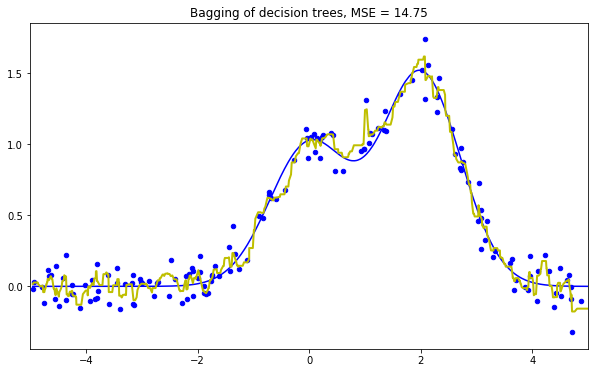

In [8]:
import numpy as np

import warnings
warnings.filterwarnings('ignore')
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, BaggingRegressor
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
import matplotlib.pyplot as plt
%matplotlib inline

n_train = 150        
n_test = 1000       
noise = 0.1

# Generate data
np.random.seed(42)

n_train = 150        
n_test = 1000       
noise = 0.1

# Generate data
def f(x):
    x = x.ravel()
    return np.exp(-x ** 2) + 1.5 * np.exp(-(x - 2) ** 2)

def generate(n_samples, noise):
    X = np.random.rand(n_samples) * 10 - 5
    X = np.sort(X).ravel()
    y = np.exp(-X ** 2) + 1.5 * np.exp(-(X - 2) ** 2) + \
        np.random.normal(0.0, noise, n_samples)
    X = X.reshape((n_samples, 1))
    return X, y

X_train, y_train = generate(n_samples=n_train, noise=noise)
X_test, y_test = generate(n_samples=n_test, noise=noise)

def get_bootstrap_samples(data, n_samples):
    indices = np.random.randint(0, len(data), n_samples)
    samples = data[indices]
    return samples

dtrees_bagging = []
def bagging_fit(X, y, n_trees=10, samples_share=1.5):
    dtrees_bagging.clear()
    full_X_y = np.array(list(zip(np.array(X)[:, 0], y)))
    for t in range(n_trees):
        samp_X_y = get_bootstrap_samples(
            full_X_y, 
            int(len(full_X_y) / samples_share)
        )
        X_new = samp_X_y[:, 0].reshape((len(samp_X_y), 1))
        y_new = samp_X_y[:, 1]
        dtrees_bagging.append(DecisionTreeRegressor().fit(X_new, y_new))


def bagging_predict(X):
    d_predicts = []
    for dtree in dtrees_bagging:
        d_predicts.append(dtree.predict(X))
    d_predicts = np.array(d_predicts)
    return np.mean(d_predicts, axis=0)
    
bagging_fit(X_train, y_train)
bdt_predict = bagging_predict(X_test)

plt.figure(figsize=(10, 6))
plt.plot(X_test, f(X_test), "b")
plt.scatter(X_train, y_train, c="b", s=20)
plt.plot(X_test, bdt_predict, "y", lw=2)
plt.xlim([-5, 5])
plt.title("Bagging of decision trees, MSE = %.2f" % np.sum((y_test - bdt_predict) ** 2));

##### Задание 4.

На занятии мы не успели попрактиковаться в построении алгоритма машинного обучения на основе RandomForest. Предлагается вам самостоятельно обучить `RandomForestRegressor` на той же самой сгенерированной выборке, что и в коде выше.

Вам необходимо самостоятельно разобраться, какие параметры принимает на вход функция. Документация: https://scikit-learn.org/0.20/modules/generated/sklearn.ensemble.RandomForestRegressor.html

Подберите оптимальное число деревьев (n_estimators) и глубину деревьев (max_depth) в RandomForest, аналогично тому, как вы сделали это в задании 3.

Какой алгоритм в оптимуме отработал лучше? Bagging или RandomForest?

##### Задание 5.

1. Замените функцию `np.exp(-x ** 2) + 1.5 * np.exp(-(x - 2) ** 2)` в задании 3 на более сложную:  
`1/10 * (ln(x)/2)**sin(x)` в диапазоне `27 > x > 16` (https://snob.ru/selected/entry/8779)
2. Увеличьте шум.

Проделайте те же самые шаги - обучите обычное дерево решений, бэггинг деревьев решение и RandomForest. Сравните метрики. Насколько они отличаются от того, что получилось в задании 3 и 4?